In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [144]:
dataset = pd.read_csv("bike_sharing.csv")
dataset = dataset.drop(columns= ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'], axis = 0)
dataset.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


(17379, 1)

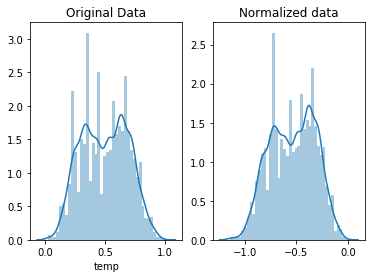

In [154]:
# now transforming feature variable
from scipy import stats
x_normalized_data = stats.boxcox(dataset['temp'])
fig, ax=plt.subplots(1,2)
sns.distplot(dataset['temp'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x_normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
x_normalized_data = x_normalized_data[0].reshape(len(x_normalized_data[0]), 1)
x_normalized_data.shape
# x_dataset = x_normalized_data

Text(0.5,1,'Normalized data')

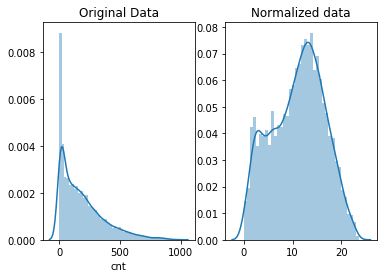

In [146]:
# now transforming feature variable
from scipy import stats
normalized_data = stats.boxcox(dataset['cnt'])
fig, ax=plt.subplots(1,2)
sns.distplot(dataset['cnt'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [147]:
from scipy import stats
import matplotlib.pyplot as plt
len(normalized_data[0])
normalized_data = normalized_data[0].reshape(len(normalized_data[0]), 1)
normalized_data.shape

(17379, 1)

In [155]:
## Split the dataset into features and labels
x_dataset = x_normalized_data
# y_dataset = pd.DataFrame(dataset.Salary)
y_dataset = normalized_data
x_train_data, x_test_data, y_train_data, y_test_data = \
            train_test_split(x_dataset, y_dataset, test_size=0.25, random_state=42)

# Import linear regression class
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train_data, y_train_data)

y_pred_test = regression.predict(x_test_data)
y_pred_train = regression.predict(x_train_data)

In [156]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
def accuracy( y_data_test, y_pred_test):

    total_error = 0
    for i in range(0, len(y_data_test)):
        total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
    total_error = (total_error / len(y_data_test))
    accuracy = 1 - total_error
    return accuracy * 100
print((mean_absolute_error(y_test_data,y_pred_test)))

print("Test EVS: ", explained_variance_score(y_test_data, y_pred_test), 
      "Train EVS: ", explained_variance_score(y_train_data, y_pred_train))

print("accuracy test: ", accuracy(np.array(y_test_data), y_pred_test))
print("accuracy train: ", accuracy(np.array(y_train_data), y_pred_train))

r_score_test = r2_score(y_test_data,y_pred_test) 
r_score_train = r2_score(y_train_data, y_pred_train) 

print("r_score_test : ",r_score_test)
print("r_score_train : ",r_score_train)



3.91438812283346
Test EVS:  0.17066046461091267 Train EVS:  0.17267668662588553
accuracy test:  [-inf]
accuracy train:  [-inf]
r_score_test :  0.17063420106626226
r_score_train :  0.17267668662588553


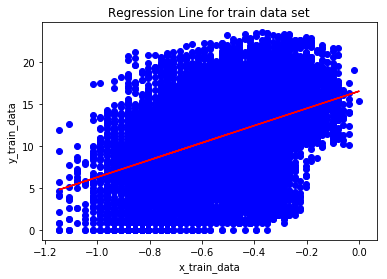

In [157]:
plt.scatter(x_train_data, y_train_data, color = "blue")
plt.plot(x_train_data, y_pred_train, color = "red")
plt.title("Regression Line for train data set")
plt.xlabel("x_train_data")
plt.ylabel("y_train_data")
plt.legend
plt.show()

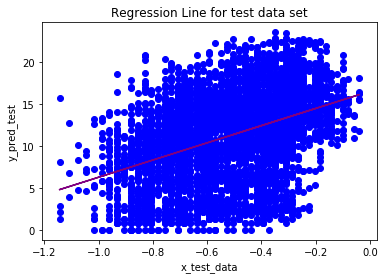

In [158]:
plt.scatter(x_test_data, y_test_data, color = "blue")
plt.plot(x_test_data, y_pred_test, color = "purple")
plt.title("Regression Line for test data set")
plt.xlabel("x_test_data")
plt.ylabel("y_pred_test")
plt.show()

In [159]:
log = -0.04
rmse = 0.10509208321590395 mean = 11
Test EVS:  93.71944327824308 Train EVS:  96.56006704010505
accuracy test:  [90.74083842]
accuracy train:  [93.85391189]
r_score_test :  92.28436448471685
r_score_train :  96.56006704010505
    
sqrt(sqrt) = 0.06
rmse = 12 mean = 271.327262
Test EVS:  93.00400318591132 Train EVS:  93.45721267532687
accuracy test:  [98.41389095]
accuracy train:  [97.99887852]
r_score_test :  92.81417195271693
r_score_train :  93.45721267532687

cbrt = 0.10
rmse = 1.4 mean = 41
Test EVS:  89.05871871753182 Train EVS:  95.34506902377746
accuracy test:  [97.06660505]
accuracy train:  [97.77743857]
r_score_test :  87.67008369262774
r_score_train :  95.34506902377746

no skewness = 0.35411967922959153
rmse = 6229.172416338358 mean = 76003
Test EVS:  93.95298683920221 Train EVS:  95.77558327241545
accuracy test:  [89.88464758]
accuracy train:  [93.56679636]
r_score_test :  93.54129193446279
r_score_train :  95.77558327241545
    
    
    0.23129378682477786
Test EVS:  0.8863657434882558 Train EVS:  0.9370642728774519
accuracy test:  [98.98818097]
accuracy train:  [98.97527365]
r_score_test :  0.8710995477146144
r_score_train :  0.9370642728774519